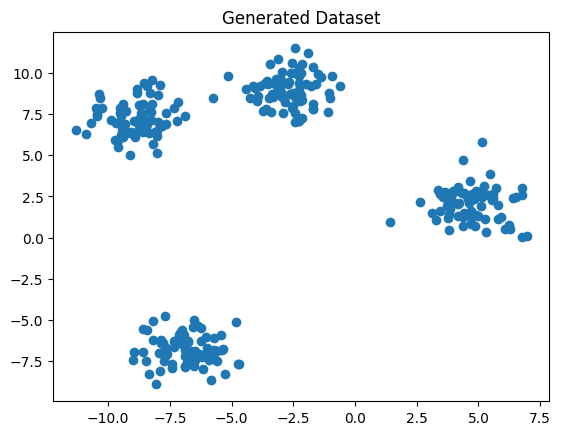

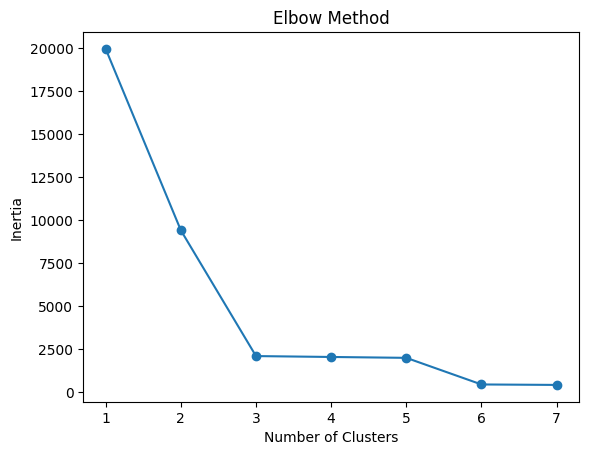

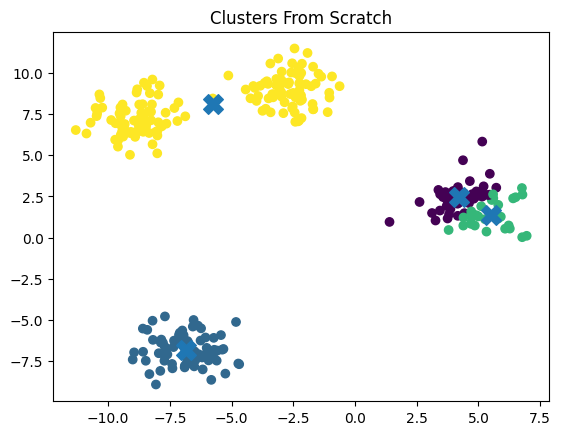

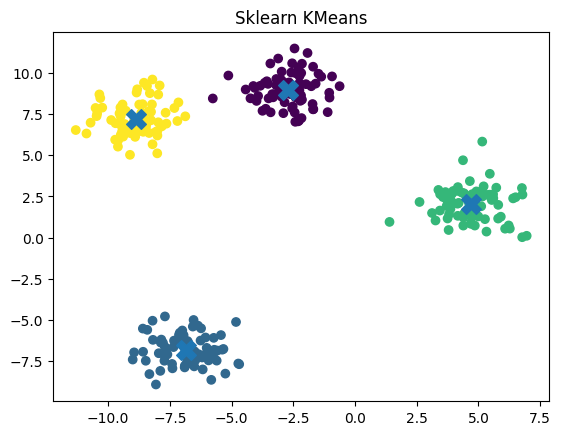

Silhouette Score (Scratch): 0.6142692573892835
Silhouette Score (Sklearn): 0.7915830011443039


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# -------------------------------
# Step 1: Generate Synthetic Data
# -------------------------------

X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

plt.scatter(X[:,0], X[:,1])
plt.title("Generated Dataset")
plt.show()

# -------------------------------
# Step 2: K-Means From Scratch
# -------------------------------

class KMeansScratch:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        np.random.seed(42)
        random_idx = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iters):
            self.labels = self.assign_clusters(X)
            new_centroids = self.update_centroids(X)

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def assign_clusters(self, X):
        clusters = []
        for point in X:
            distances = [np.linalg.norm(point - centroid) for centroid in self.centroids]
            clusters.append(np.argmin(distances))
        return np.array(clusters)

    def update_centroids(self, X):
        new_centroids = []
        for i in range(self.k):
            points = X[self.labels == i]
            new_centroids.append(points.mean(axis=0))
        return np.array(new_centroids)

    def inertia(self, X):
        total = 0
        for i in range(self.k):
            points = X[self.labels == i]
            total += np.sum((points - self.centroids[i])**2)
        return total

# -------------------------------
# Step 3: Elbow Method
# -------------------------------

inertias = []

for k in range(1,8):
    model = KMeansScratch(k=k)
    model.fit(X)
    inertias.append(model.inertia(X))

plt.plot(range(1,8), inertias, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# -------------------------------
# Step 4: Train Final Model
# -------------------------------

k = 4
model = KMeansScratch(k=k)
model.fit(X)

plt.scatter(X[:,0], X[:,1], c=model.labels)
plt.scatter(model.centroids[:,0], model.centroids[:,1], s=200, marker='X')
plt.title("Clusters From Scratch")
plt.show()

# -------------------------------
# Step 5: Sklearn Comparison
# -------------------------------

sk_model = KMeans(n_clusters=4, random_state=42)
sk_labels = sk_model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=sk_labels)
plt.scatter(sk_model.cluster_centers_[:,0], sk_model.cluster_centers_[:,1], s=200, marker='X')
plt.title("Sklearn KMeans")
plt.show()

# -------------------------------
# Step 6: Silhouette Scores
# -------------------------------

scratch_score = silhouette_score(X, model.labels)
sklearn_score = silhouette_score(X, sk_labels)

print("Silhouette Score (Scratch):", scratch_score)
print("Silhouette Score (Sklearn):", sklearn_score)
